<a href="https://colab.research.google.com/github/babaraokalyankar/Machine-Learning/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install minisom

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


In [53]:
# Assuming your dataset is in a CSV file
data = pd.read_csv('google_review_ratings.csv')
df = pd.DataFrame(data)
# Remove column 11 by index (which is 12th column in 0-based index)
# Fill NaN values in a specific column with the mean of that column
# df = df.drop(df.columns[24], axis=1)

# df['Category 12'] = df['Category 12'].fillna(df['Category 12'].mean())



df.info()
# #Extract the ratings (ignoring the first column which is user ID)
# ratings = df.iloc[:, 1:-1].values

# # Normalize the ratings (Standardization)
# scaler = StandardScaler()
# ratings_scaled = scaler.fit_transform(ratings)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [54]:
# Fill NaN values in all numeric columns with their respective means
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == 'float64' or x.dtype == 'int64' else x, axis=0)


In [55]:
# Check for null (NaN) values in all columns
null_values = df.isna().sum()

# Print the number of missing values in each column
print(null_values)


User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
Unnamed: 25    0
dtype: int64


In [56]:
df = df.drop(df.columns[25], axis=1)
df = df.drop(df.columns[11], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 12  5456 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

In [58]:
som = MiniSom(x=10, y=10, input_len=ratings_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(ratings_scaled, 5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: nan


In [64]:
# Get the winning node for each data point
win_map = np.array([som.winner(x) for x in ratings_scaled])

# Create a column for clusters (each unique (x, y) position is a cluster)
clusters = [f"Cluster_{win[0]}_{win[1]}" for win in win_map]

# Add clusters as a new column to the dataframe
data['Cluster'] = clusters


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 12  5456 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

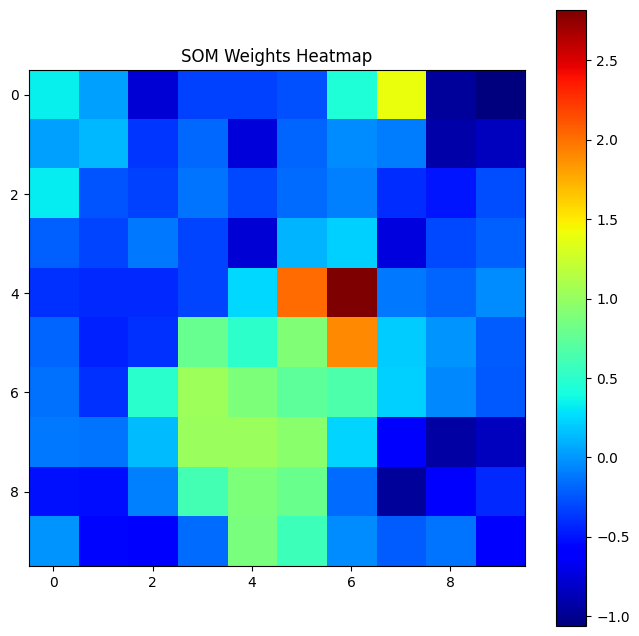

In [60]:
plt.figure(figsize=(8, 8))

# Title for the plot
plt.title('SOM Weights Heatmap')

# Plot the weights (SOM's 2D grid)
weights = som.get_weights()  # Get the weight matrix
plt.imshow(weights[:, :, 0], cmap='jet')  # Show the first component as heatmap (you can choose other components too)
plt.colorbar()  # Show color bar to understand the scale
plt.show()